# Table of Contents
 <p>

In [1]:
import os
os.chdir('../../')
import spikelearn as spk

In [2]:
from sklearn.datasets import make_blobs

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
plt.style.use('dark_background')
mpl.rc("figure", figsize=(10,6))
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.facecolor'] = (1,1,1,0)
mpl.rcParams['figure.facecolor'] = (1,1,1,0)
sns.set_palette('deep', color_codes=True)

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
clf = LogisticRegression()

In [6]:
import numpy as np
import pandas as pd

In [7]:
big, l = make_blobs(1000, 2, 6)
df = pd.DataFrame(big)
df['target'] = l
df['group'] = np.arange(df.shape[0])
df = df.set_index(['group', 'target'])

noiser = df+np.random.rand(*df.shape)*6
small = df[::10]
sl = small.reset_index().target

color = np.array(sns.color_palette('Set2', 12))

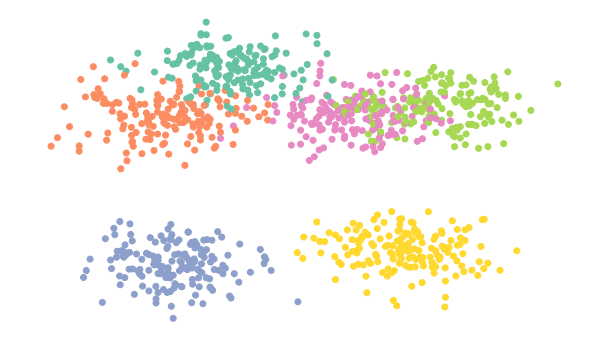

In [8]:
plt.scatter(df[0], df[1], c=color[l])

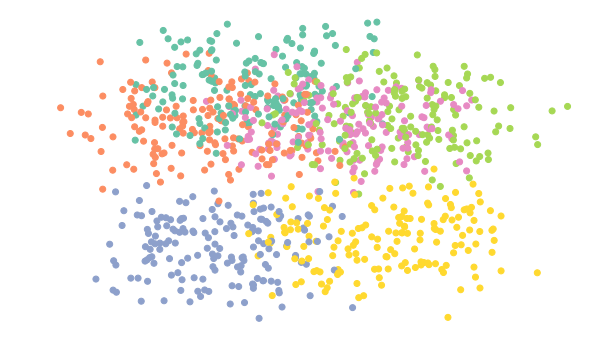

In [9]:
plt.scatter(noiser[0], noiser[1], c=color[l])

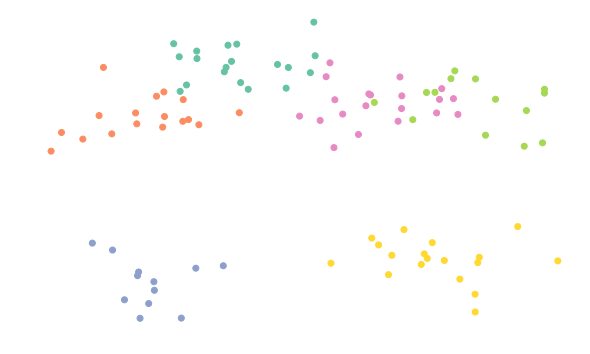

In [10]:
plt.scatter(small[0], small[1], c=color[sl])

In [11]:
%load_ext autoreload
%autoreload 2

In [32]:
res = spk.shuffle_val_predict(clf, [noiser, small], ['noiser', 'small'], cross_prediction=True)

In [36]:
res.score.groupby(['trained_on', 'tested_on']).mean()

cv  trained_here  n_features  pearson_max  pearson_mean  \
trained_on tested_on                                                            
noiser     noiser      2          True           2     0.742271      0.792641   
           small       2         False           2     0.423966      0.811995   
small      noiser      2         False           2     0.551765      0.657857   
           small       2          True           2     0.875739      0.885537   

                      accuracy  
trained_on tested_on            
noiser     noiser         0.58  
           small          0.27  
small      noiser         0.35  
           small          0.76

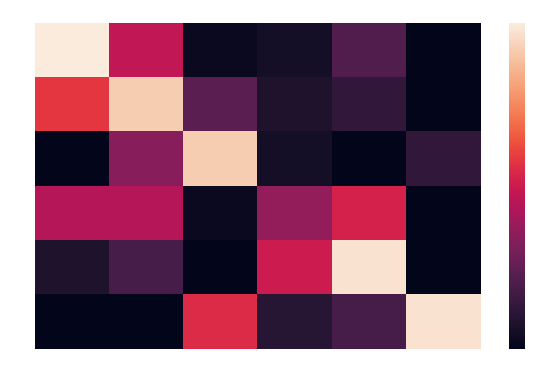

In [33]:
res.confusion_matrix();

,0,1,2,3,4,5
true_label,,,,,,
0.0,0.376207,0.332386,0.010055,0.228419,0.052429,0.000503
1.0,0.285102,0.440930,0.081526,0.157336,0.033591,0.001515
2.0,0.052880,0.221663,0.570049,0.032029,0.003661,0.119718
3.0,0.279313,0.181083,0.018280,0.316772,0.191218,0.013334
4.0,0.151733,0.077449,0.007030,0.357849,0.360956,0.044982
5.0,0.044803,0.075083,0.213742,0.118972,0.069523,0.477876


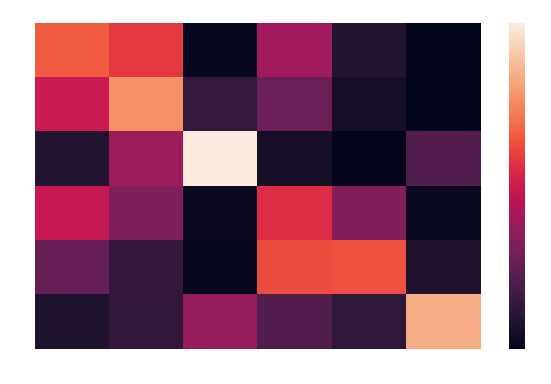

In [25]:
res.proba_matrix(grouping=('trained_here', True))